In [2]:
# Import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# LOAD DATA

In [3]:
df = pd.read_csv(r'data.csv' ,header = None, names = ['age', 'sex', 'chest_pain_type', 'rest_blood_press', 'cholesterol',
                          'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 
                          'exer_ind_angina', 'st_depression', 'st_slope',                                                                                                        
                          'num_major_vessels', 'thallium_scint', 'ca_disease'], skiprows=1
                 )

In [4]:
df.head()

,age,sex,chest_pain_type,rest_blood_press,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exer_ind_angina,st_depression,st_slope,num_major_vessels,thallium_scint,ca_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
df.shape

(303, 14)

# CLEAN DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   rest_blood_press     303 non-null    int64  
 4   cholesterol          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   max_heart_rate       303 non-null    int64  
 8   exer_ind_angina      303 non-null    int64  
 9   st_depression        303 non-null    float64
 10  st_slope             303 non-null    int64  
 11  num_major_vessels    303 non-null    object 
 12  thallium_scint       303 non-null    object 
 13  ca_disease           303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [7]:
# Replace all non numeric data with NaN, convert strings to numbers.


In [8]:
# df_clean = df.apply(pd.to_numeric, errors='coerce')
df = df[~df.isin(['?'])]
df = df.fillna(np.NaN, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   rest_blood_press     303 non-null    int64  
 4   cholesterol          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   max_heart_rate       303 non-null    int64  
 8   exer_ind_angina      303 non-null    int64  
 9   st_depression        303 non-null    float64
 10  st_slope             303 non-null    int64  
 11  num_major_vessels    299 non-null    object 
 12  thallium_scint       301 non-null    object 
 13  ca_disease           303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [9]:
# Looks great we have 6 null values, 
# 4 in num_major_vessels     and 2 in thallium_scint        as expected. 
# We can also observe that none of the other fields contain any null values. 
# Seeing as there are only a handful of these values and none in the response variable,
# it is not necessary to remove these records from the dataset at this stage.

# We now have a dataset with 303 records and 14 numeric fields, 
# as per the data dictionary, there are still 6 missing values 
# in the 'num_major_vessels' and 'thallium_scint' fields though. 
# Due to the low number of missing values and even distribution of values 
# in these fields (see explore analysis below) we will now substitute these with median values.

In [10]:
# Fill the empty cells with the median values 
median = df['num_major_vessels'].median()
df['num_major_vessels'].fillna(median, inplace=True)

In [11]:
median = df['thallium_scint'].median()
df['thallium_scint'].fillna(median, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   rest_blood_press     303 non-null    int64  
 4   cholesterol          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   max_heart_rate       303 non-null    int64  
 8   exer_ind_angina      303 non-null    int64  
 9   st_depression        303 non-null    float64
 10  st_slope             303 non-null    int64  
 11  num_major_vessels    303 non-null    object 
 12  thallium_scint       303 non-null    object 
 13  ca_disease           303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


# EXPLORE DATA 

In [13]:
df.nunique()

age                     41
sex                      2
chest_pain_type          4
rest_blood_press        50
cholesterol            152
fasting_blood_sugar      2
rest_ecg                 3
max_heart_rate          91
exer_ind_angina          2
st_depression           40
st_slope                 3
num_major_vessels        5
thallium_scint           4
ca_disease               5
dtype: int64

In [14]:
# Extract categorical variables for analysis.
df_cat = df.copy()
names_cat = ('sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exer_ind_angina', 'st_slope',
             'num_major_vessels', 'thallium_scint', 'ca_disease')
df_cat = df_cat.loc[:, names_cat]

In [15]:
# Extract continuous variables for analysis.
#df_fin.reset_index(drop=True, inplace=True)
df_con = df.copy()
names_con = ('age', 'rest_blood_press', 'cholesterol', 'max_heart_rate', 'st_depression')
df_con = df_con.loc[:, names_con]

In [16]:
# Plotting label dictionary
# Plotting label dictionary
plot_cat = [('sex', ['female', 'male']),
              ('chest_pain_type', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']),
              ('fasting_blood_sugar', ['fbs > 120mg', 'fbs < 120mg']),
              ('rest_ecg', ['normal', 'ST T-wave', 'left ventricular']),
              ('exer_ind_angina', ['yes', 'no']),
              ('st_slope', ['upsloping', 'flat', 'downsloping']),
              ('num_major_vessels', ['0', '1', '2', '3']),
              ('thallium_scint', ['normal', 'fixed defect', 'reversible defect']),
              ('ca_disease', ['No CA disease', 'CA disease'])]

In [17]:
plot_con = [('age', 'age in years'),
            ('rest_blood_press', 'blood pressure in mm Hg'),
              ('cholesterol', 'serum cholesterol in mg/d'),
              ('max_heart_rate', 'maximum heart rate achieved'),
              ('st_depression', 'ST depression by exercise relative to rest'),
              ('ca_disease', 'Coronary Artery disease')]

In [18]:
# Extract numeric variables for analysis.
df.reset_index(drop=True, inplace=True)
df_num = df.copy()
names_num = ('age', 'sex', 'chest_pain_type', 'rest_blood_press', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
             'max_heart_rate', 'exer_ind_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thallium_scint',
             'ca_disease')
df_num = df_num.loc[:, names_num]

0    164
1     55
2     36
3     35
4     13
Name: ca_disease, dtype: int64


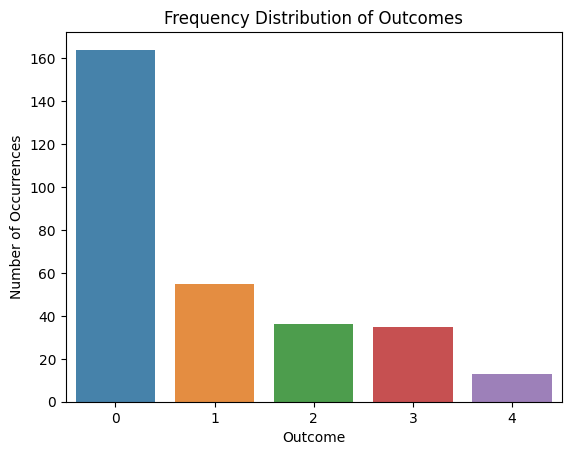

In [19]:
import seaborn as sns 
#outcome_counts = df_fin_cat.groupby('ca_disease').size()
outcome_counts = df_cat['ca_disease'].value_counts()
print(outcome_counts)

# Plot outcome counts.
ax = sns.barplot(x=outcome_counts.index, y=outcome_counts.values, alpha=0.9)
ax.tick_params('y')
ax.tick_params('x')
plt.title('Frequency Distribution of Outcomes')
plt.ylabel('Number of Occurrences')
plt.xlabel('Outcome')
plt.show();

0    164
1    139
Name: num_bin, dtype: int64


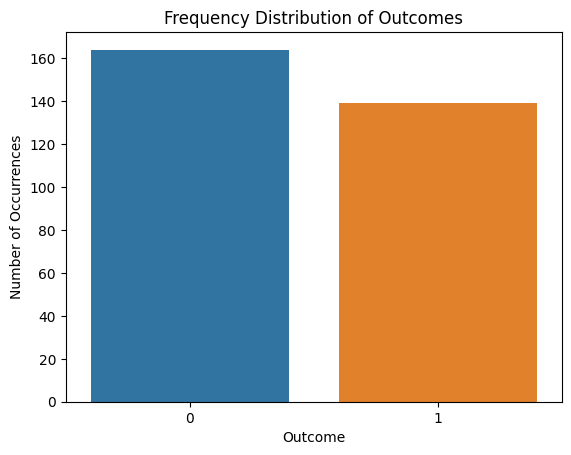

In [20]:
# Transform y variable
df_cat['num_bin'] = df['ca_disease'].apply(lambda x: 1 if x > 0 else 0)

outcome_counts_bin = df_cat['num_bin'].value_counts()
print(outcome_counts_bin)
ax = sns.barplot(x=outcome_counts_bin.index, y=outcome_counts_bin.values)
ax.tick_params('y')
ax.tick_params('x')
plt.title('Frequency Distribution of Outcomes')
plt.ylabel('Number of Occurrences')
plt.xlabel('Outcome')
plt.show()

In [21]:
# Class level counts for categorical variables.
for i in names_cat:
    print(df_cat[i].value_counts())

1    206
0     97
Name: sex, dtype: int64
4    144
3     86
2     50
1     23
Name: chest_pain_type, dtype: int64
0    258
1     45
Name: fasting_blood_sugar, dtype: int64
0    151
2    148
1      4
Name: rest_ecg, dtype: int64
0    204
1     99
Name: exer_ind_angina, dtype: int64
1    142
2    140
3     21
Name: st_slope, dtype: int64
0      176
1       65
2       38
3       20
0.0      4
Name: num_major_vessels, dtype: int64
3      166
7      117
6       18
3.0      2
Name: thallium_scint, dtype: int64
0    164
1     55
2     36
3     35
4     13
Name: ca_disease, dtype: int64


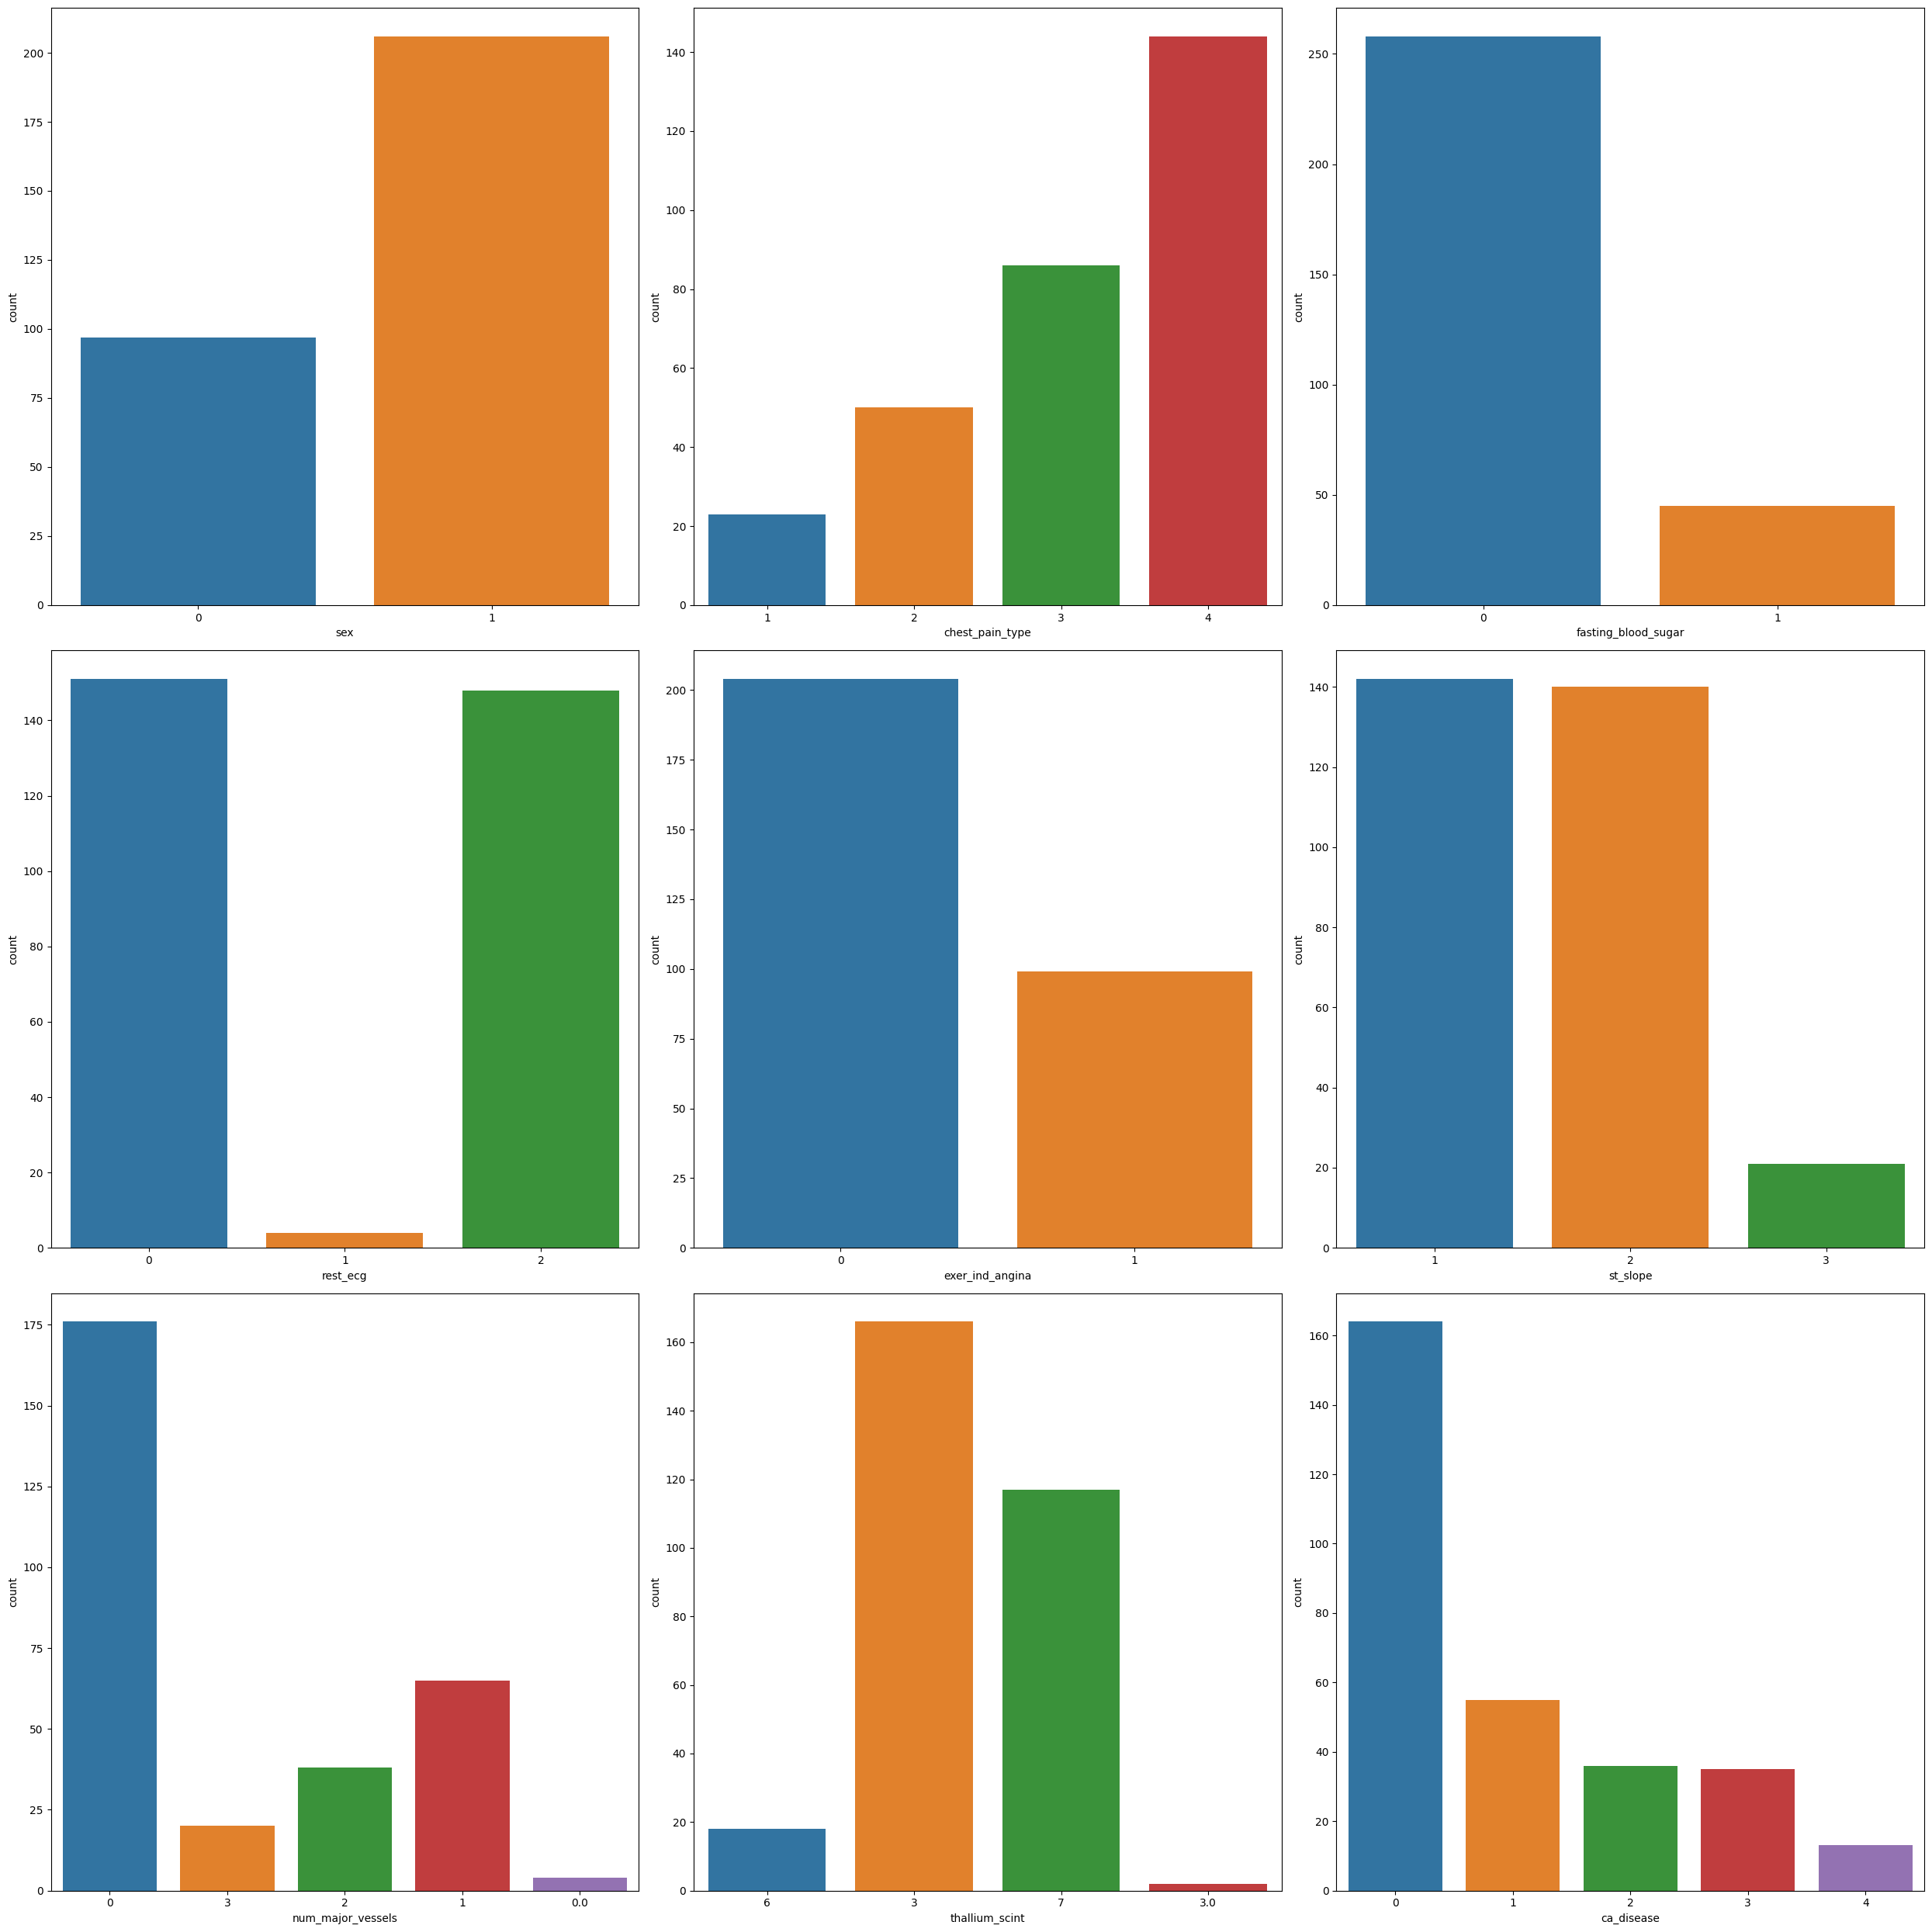

In [22]:
#Bar chart plot of categorical variables.
fig, ax = plt.subplots(3, 3, figsize=(25, 25));
for i, subplot in zip(names_cat, ax.flatten()):
    subplot.tick_params('y');
    subplot.tick_params('x');
    cp = sns.countplot(x=df_cat[i], ax=subplot);
plt.tight_layout()

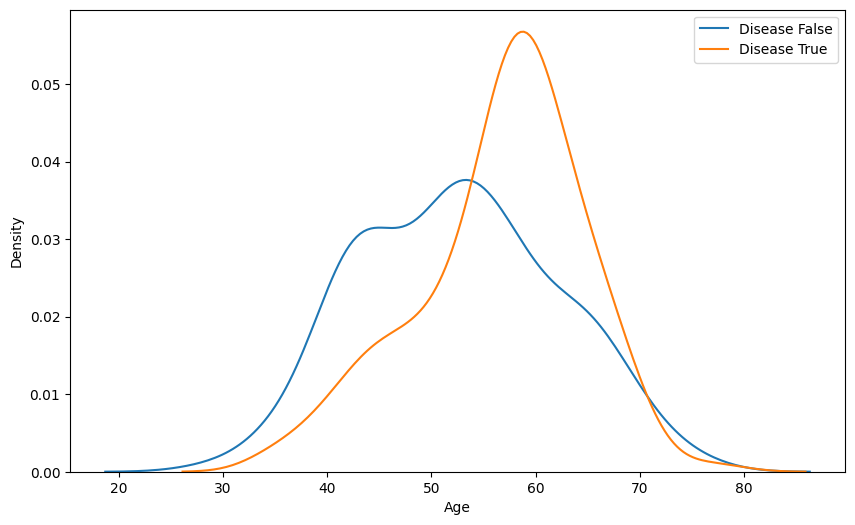

In [23]:
# Continuous density plot

def plotAge(df, axes, single_plot=True):

    if (single_plot):
        sns.kdeplot (data=df.loc[(df['ca_disease'] == 0), 'age'],  label = 'Disease False')
        sns.kdeplot (data=df.loc[(df['ca_disease'] == 1), 'age'],  label = 'Disease True')
        plt.xlabel('Age')
        plt.ylabel('Density')
        plt.xticks()
        plt.yticks()
        plt.legend()
        plt.show()

    else:
        facet_grid = sns.FacetGrid(df, hue='ca_disease')
        _ = facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0]);

        legend_labels = ['disease false', 'disease true']
        for t, l in zip(axes[0].get_legend().texts, legend_labels):
            t.set_text(l)
            axes[0].set(xlabel='age', ylabel='density')

        avg = df[["age", "ca_disease"]].groupby(['age'], as_index=False).mean();
        _ = sns.barplot(x='age', y='ca_disease', data=avg, ax=axes[1]);
        _ = axes[1].set(xlabel='age', ylabel='disease probability');

df_num['ca_disease'] = df_num['ca_disease'].apply(lambda x: 1 if x > 0 else 0)

fig_age, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), squeeze=False)
_ = plotAge(df=df_num, axes=axes, single_plot=True)

In [24]:
df_con.describe()

,age,rest_blood_press,cholesterol,max_heart_rate,st_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [25]:
# Checking correlation
correlation = df.corr()
print(correlation["ca_disease"].sort_values(ascending=False))

ca_disease             1.000000
st_depression          0.504092
chest_pain_type        0.407075
exer_ind_angina        0.397057
st_slope               0.377957
sex                    0.224469
age                    0.222853
rest_ecg               0.183696
rest_blood_press       0.157754
cholesterol            0.070909
fasting_blood_sugar    0.059186
max_heart_rate        -0.415040
Name: ca_disease, dtype: float64


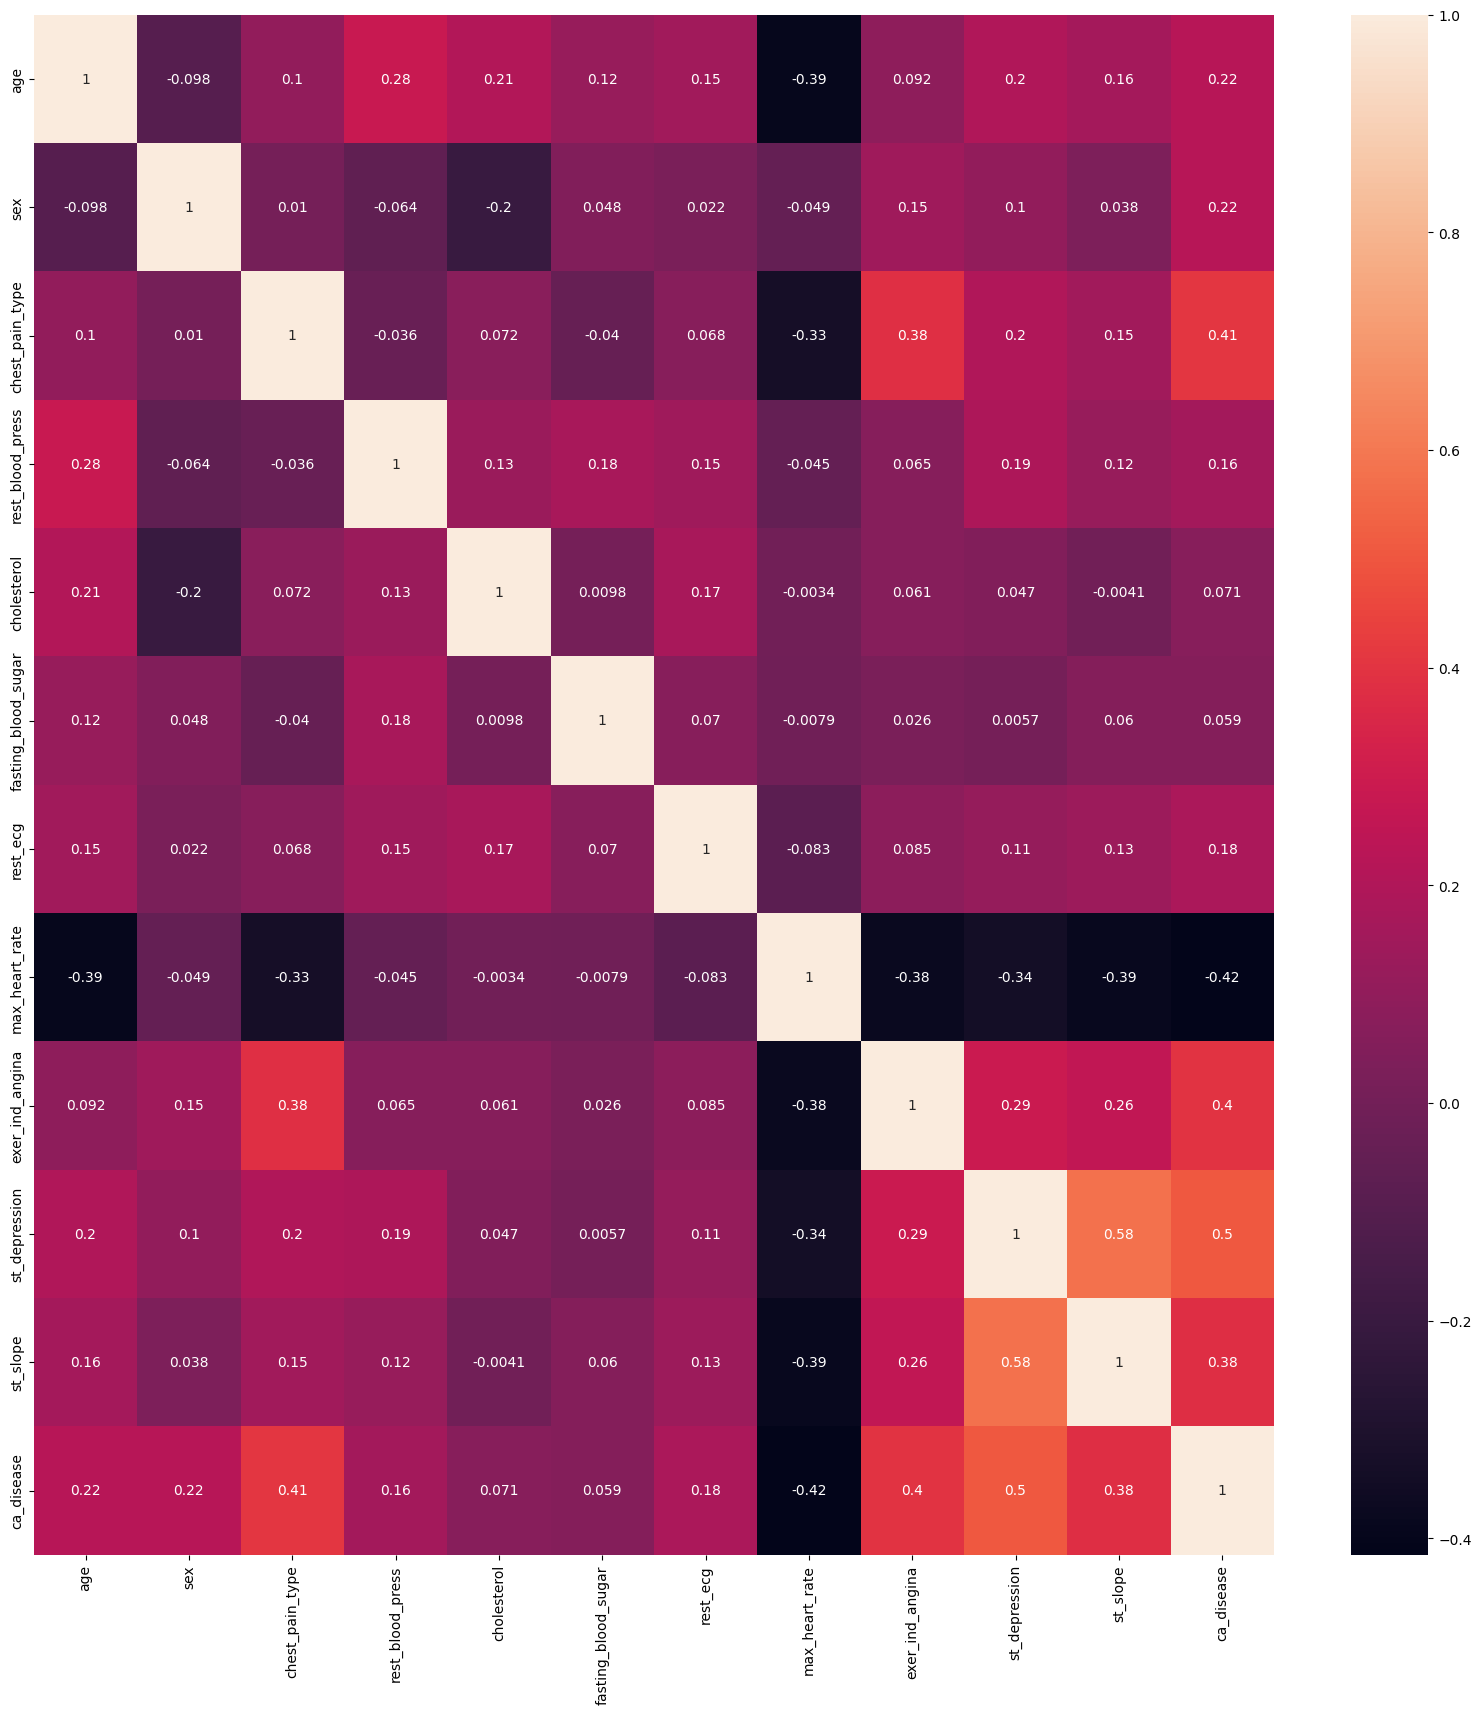

In [26]:
plt.figure(figsize=(20,20))
ax=sns.heatmap(correlation, annot = True)
plt.show(ax)

In [27]:
# Transform y variable
df1 = df.copy()
df1['ca_disease'] = df1['ca_disease'].apply(lambda x: 1 if x > 0 else 0)
df1.head()

,age,sex,chest_pain_type,rest_blood_press,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exer_ind_angina,st_depression,st_slope,num_major_vessels,thallium_scint,ca_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [94]:
df1.shape

(303, 14)

In [28]:
X1 = df1.drop('ca_disease', axis = 1)
y1 = df1.ca_disease
y1 = np.array(y1)

In [60]:
X1.shape


(303, 13)

In [61]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1, test_size = 0.2)


In [97]:
# First Model - Logisitic Regression 
logmodel = LogisticRegression()

In [98]:
logmodel.fit(X1_train, y1_train)
logmodel.predict(X1_test)
logpred1= logmodel.predict(X1_test)

In [99]:
from sklearn import model_selection
from sklearn import metrics
log1_confusion = metrics.confusion_matrix(y1_test, logpred1)
print('Confusion Matrix for Test:\n{}'.format(log1_confusion))
acc1= accuracy_score(y1_test, logpred1)
print('Test case accuracy is :'+ format(acc1))
print('\n')

Confusion Matrix for Test:
[[32  3]
 [ 5 21]]
Test case accuracy is :0.8688524590163934




In [100]:
from sklearn.metrics import classification_report, accuracy_score
log1_classification =classification_report(y1_test, logpred1)
print(log1_classification)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.88      0.81      0.84        26

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



Text(95.72222222222221, 0.5, 'Truth')

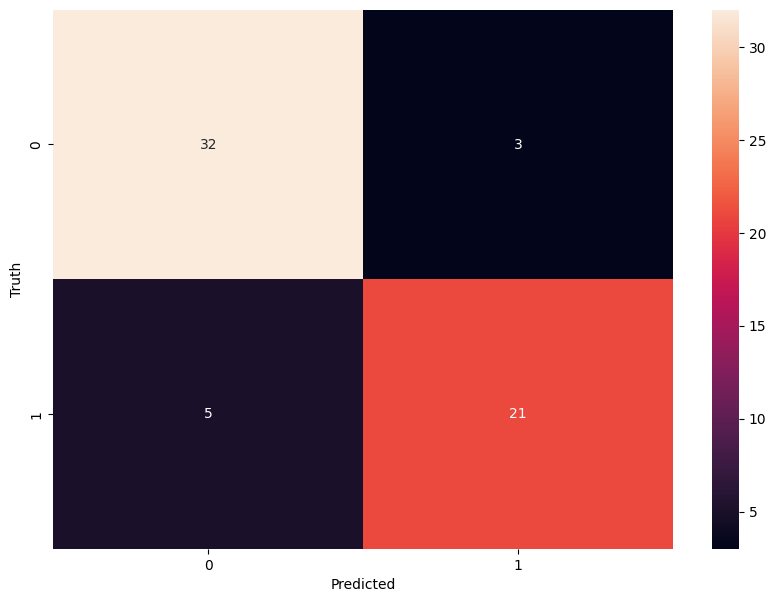

In [66]:
plt.figure(figsize = (10,7))
sns.heatmap(log1_confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
# Second Model - DECISION MODEL 
dt1_model = DecisionTreeClassifier(max_depth = 25)
dt1_model.fit(X1_train, y1_train)
dt1_predict= dt1_model.predict(X1_test)

In [68]:
dt1_confusion = metrics.confusion_matrix(y1_test, dt1_predict)
print('Confusion Matrix for Test:\n{}'.format(dt1_confusion))
acc1_dt= accuracy_score(y1_test, dt1_predict)
print('Test case accuracy is :'+ format(acc1_dt))
print('\n')

Confusion Matrix for Test:
[[23 12]
 [ 7 19]]
Test case accuracy is :0.6885245901639344




Text(95.72222222222221, 0.5, 'Truth')

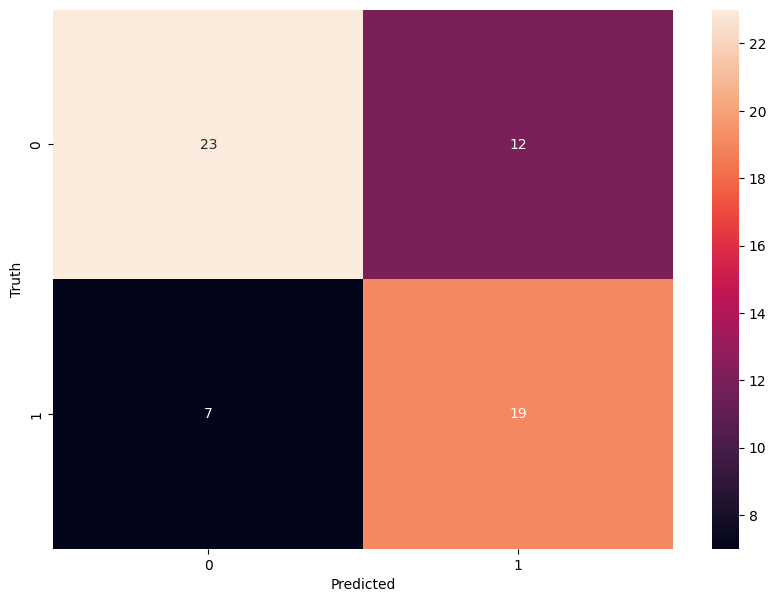

In [69]:
plt.figure(figsize = (10,7))
sns.heatmap(dt1_confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
dt1_classification =classification_report(y1_test, dt1_predict)
print(dt1_classification)

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        35
           1       0.61      0.73      0.67        26

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.70      0.69      0.69        61



In [71]:
# Third Model - Random Forest MODEL 
rf1_model = RandomForestClassifier(n_estimators = 40)
rf1_model.fit(X1_train, y1_train)
rf1_predict= rf1_model.predict(X1_test)

In [72]:
rf1_confusion = metrics.confusion_matrix(y1_test, rf1_predict)
print('Confusion Matrix for Test:\n{}'.format(rf1_confusion))
acc1_rf= accuracy_score(y1_test, rf1_predict)
print('Test case accuracy is :'+ format(acc1_rf))
print('\n')

Confusion Matrix for Test:
[[31  4]
 [ 3 23]]
Test case accuracy is :0.8852459016393442




Text(95.72222222222221, 0.5, 'Truth')

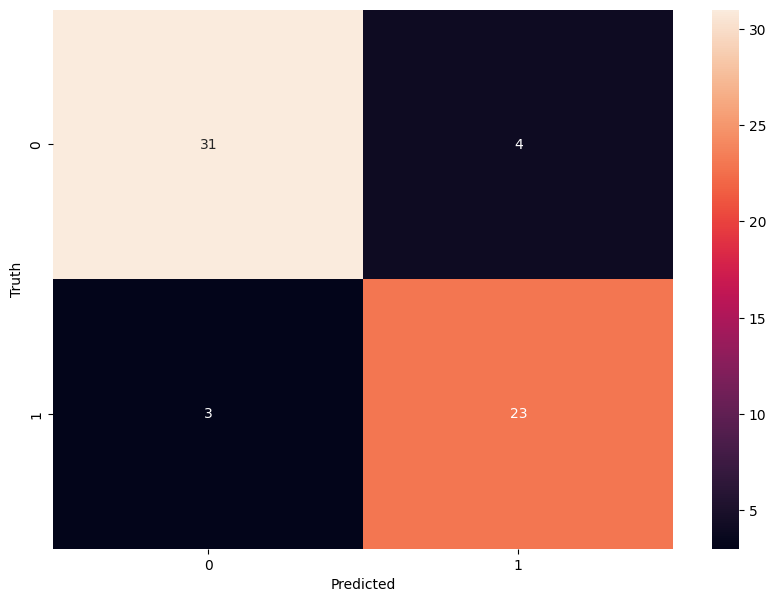

In [73]:
plt.figure(figsize = (10,7))
sns.heatmap(rf1_confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# USING CROSS VALIDATION 

In [74]:
from sklearn.model_selection import cross_val_score
LR_CV = []
lr_cv = 0 
for i in cross_val_score(LogisticRegression(), X1, y1, cv =5):
    LR_CV.append(i)

for j in LR_CV:
    lr_cv +=j 
    
print(LR_CV)
print('Average Accuracy of Logisitic Regression', lr_cv/5)

[0.8688524590163934, 0.8524590163934426, 0.7868852459016393, 0.8166666666666667, 0.7833333333333333]
Average Accuracy of Logisitic Regression 0.821639344262295


In [75]:
DT_CV = []
av_cv = 0 
for i in cross_val_score(DecisionTreeClassifier (), X1, y1, cv = 5):
    DT_CV.append(i)

for j in DT_CV:
    av_cv +=j 
    
print(DT_CV)
print('Average Accuracy of Decision Tree', av_cv/5)

[0.7213114754098361, 0.9180327868852459, 0.6721311475409836, 0.8166666666666667, 0.75]
Average Accuracy of Decision Tree 0.7756284153005465


In [76]:
RF_CV = []
rf_cv = 0 
for i in cross_val_score(RandomForestClassifier (), X1, y1, cv = 5):
    RF_CV.append(i)

for j in RF_CV:
    rf_cv +=j 
    
print(RF_CV)
print('Average Accuracy of Random Forest', rf_cv/5)

[0.8524590163934426, 0.8688524590163934, 0.7868852459016393, 0.8333333333333334, 0.7833333333333333]
Average Accuracy of Random Forest 0.8249726775956285


# USING PREPROCESSING TOOL - MINMAXSCALER

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2 = df1.copy()

In [78]:
df2.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_blood_press', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exer_ind_angina',
       'st_depression', 'st_slope', 'num_major_vessels', 'thallium_scint',
       'ca_disease'],
      dtype='object')

In [79]:
scaler.fit(df2[['chest_pain_type']])
df2['chest_pain_type'] = scaler.transform(df2[['chest_pain_type']])

scaler.fit(df2[['age']])
df2['age'] = scaler.transform(df2[['age']])

scaler.fit(df2[['rest_blood_press']])
df2['rest_blood_press'] = scaler.transform(df2[['rest_blood_press']])

In [80]:
scaler.fit(df2[['cholesterol']])
df2['cholesterol'] = scaler.transform(df2[['cholesterol']])

scaler.fit(df2[['fasting_blood_sugar']])
df2['fasting_blood_sugar'] = scaler.transform(df2[['fasting_blood_sugar']])

scaler.fit(df2[['rest_ecg']])
df2['rest_ecg'] = scaler.transform(df2[['rest_ecg']])

In [81]:
scaler.fit(df2[['max_heart_rate']])
df2['max_heart_rate'] = scaler.transform(df2[['max_heart_rate']])

scaler.fit(df2[['exer_ind_angina']])
df2['exer_ind_angina'] = scaler.transform(df2[['exer_ind_angina']])

scaler.fit(df2[['st_depression']])
df2['st_depression'] = scaler.transform(df2[['st_depression']])

In [82]:
scaler.fit(df2[['st_slope']])
df2['st_slope'] = scaler.transform(df2[['st_slope']])

scaler.fit(df2[['num_major_vessels']])
df2['num_major_vessels'] = scaler.transform(df2[['num_major_vessels']])

scaler.fit(df2[['thallium_scint']])
df2['thallium_scint'] = scaler.transform(df2[['thallium_scint']])

In [83]:
df2.head()

,age,sex,chest_pain_type,rest_blood_press,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exer_ind_angina,st_depression,st_slope,num_major_vessels,thallium_scint,ca_disease
0,0.708333,1,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0
1,0.791667,1,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,1
2,0.791667,1,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1
3,0.166667,1,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0
4,0.250000,0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0


In [84]:
X2 = df2.drop('ca_disease', axis = 1)
y2 = df2.ca_disease
y2 = np.array(y1)

In [85]:
LR_CV = []
lr_cv = 0 
for i in cross_val_score(LogisticRegression(), X2, y2, cv =5):
    LR_CV.append(i)

for j in LR_CV:
    lr_cv +=j 
    
print(LR_CV)
print('Average Accuracy of Logisitic Regression with MinMaxScaler', lr_cv/5)

[0.8524590163934426, 0.8688524590163934, 0.7868852459016393, 0.8666666666666667, 0.7833333333333333]
Average Accuracy of Logisitic Regression with MinMaxScaler 0.8316393442622951


In [86]:
RF_CV = []
rf_cv = 0 
for i in cross_val_score(RandomForestClassifier (), X2, y2, cv = 5):
    RF_CV.append(i)

for j in RF_CV:
    rf_cv +=j 
    
print(RF_CV)
print('Average Accuracy of Random Forest with MinMaxScaler', rf_cv/5)

[0.8360655737704918, 0.8688524590163934, 0.8032786885245902, 0.8166666666666667, 0.8]
Average Accuracy of Random Forest with MinMaxScaler 0.8249726775956283


In [87]:
DT_CV = []
av_cv = 0 
for i in cross_val_score(DecisionTreeClassifier (), X2, y2, cv = 5):
    DT_CV.append(i)

for j in DT_CV:
    av_cv +=j 
    
print(DT_CV)
print('Average Accuracy of Decision Tree with MinMaxScaler', av_cv/5)

[0.7213114754098361, 0.9180327868852459, 0.6721311475409836, 0.7666666666666667, 0.7]
Average Accuracy of Decision Tree with MinMaxScaler 0.7556284153005464


In [95]:
# pickling the model
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(rf1_model, pickle_out)
pickle_out.close()

In [101]:
# pickling the model
import pickle
pickle_out = open("Lclassifier.pkl", "wb")
pickle.dump(logmodel, pickle_out)
pickle_out.close()